## Dummy Regressor

_Naively choosing the best number for all of your prediction_

A dummy regressor is a simple machine learning model that predicts numerical values using basic rules, without actually learning from the input data. Like its classification counterpart, it serves as a baseline for comparing the performance of more complex regression models. The dummy regressor helps us understand if our models are actually learning useful patterns or just making naive predictions.

#### Dataset

This simple artificial golf dataset predicts the number of golfers visiting our golf course. It includes features like outlook, temperature, humidity, and wind, with the target variable being the number of golfers.

#### Evaluating Regression Result

Before getting into the dummy regressor itself, let’s recap the method to evaluate the regression result. While in classification case, it is very intuitive to check the accuracy of the model (just check the ratio of the matching values), in regression, it is a bit different.

RMSE (root mean squared error) is like a score for regression models. It tells us how far off our predictions are from the actual values. Just as we want high accuracy in classification to get more right answers, we want a low RMSE in regression to be closer to the true values.

> Dummy Regressor makes predictions based on simple rules, such as always returning the mean or median of the target values in the training data.

#### Training Steps

1. **Select Strategy**

   Choose one of the following strategies:

    - **Mean**: Always predicts the mean of the training target values.
    - **Median**: Always predicts the median of the training target values.
    - **Constant**: Always predicts a constant value provided by the user.

2. **Calculate the Metric**

    Calculate either mean or median, depending on your strategy.

3. **Apply Strategy to Test Data**

   Use the chosen strategy to generate a list of predicted numerical labels for your test data.

#### Key Parameters

There’s only one main key parameter in dummy regressor, which is:

1. **Strategy**: This determines how the regressor makes predictions. Common options include:
  
  - mean: Provides an average baseline, commonly used for general scenarios.
  - median: More robust against outliers, good for skewed target distributions.
  - constant: Useful when domain knowledge suggests a specific constant prediction.

2. **Constant**: When using the ‘constant’ strategy, this parameter specifies which class to always predict.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Create dataset
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain', 'sunny', 'overcast', 'rain', 'sunny', 'sunny', 'rain', 'overcast', 'rain', 'sunny', 'overcast', 'sunny', 'overcast', 'rain', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Num_Players': [52,39,43,37,28,19,43,47,56,33,49,23,42,13,33,29,25,51,41,14,34,29,49,36,57,21,23,41]
}
df = pd.DataFrame(dataset_dict)

# One-hot encode 'Outlook' column
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)

# Convert 'Wind' column to binary
df['Wind'] = df['Wind'].astype(int)

# Split data into features and target, then into training and test sets
X, y = df.drop(columns='Num_Players'), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Initialize and train the model
# Choose a strategy for your DummyRegressor ('mean', 'median', 'constant')
strategy = 'median'
dummy_reg = DummyRegressor(strategy=strategy)
dummy_reg.fit(X_train, y_train)

# Make predictions
y_pred = dummy_reg.predict(X_test)
print("Label     :",list(y_test))
print("Prediction:",list(y_pred))

# Calculate and print RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

Label     : [33, 29, 25, 51, 41, 14, 34, 29, 49, 36, 57, 21, 23, 41]
Prediction: [np.float64(40.5), np.float64(40.5), np.float64(40.5), np.float64(40.5), np.float64(40.5), np.float64(40.5), np.float64(40.5), np.float64(40.5), np.float64(40.5), np.float64(40.5), np.float64(40.5), np.float64(40.5), np.float64(40.5), np.float64(40.5)]
RMSE: 13.28


#### Visualize the Data Distribution

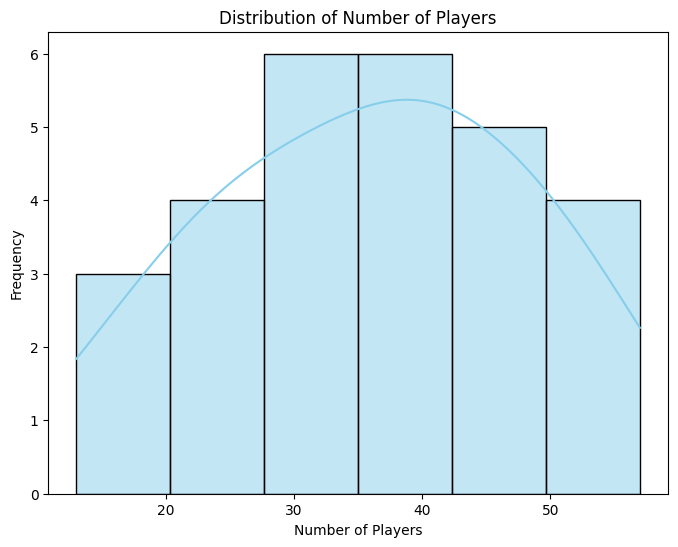

In [2]:
# Plot the distribution of 'Num_Players'
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, color='skyblue')
plt.title('Distribution of Number of Players')
plt.xlabel('Number of Players')
plt.ylabel('Frequency')
plt.show()

#### Visualize Feature Distributions

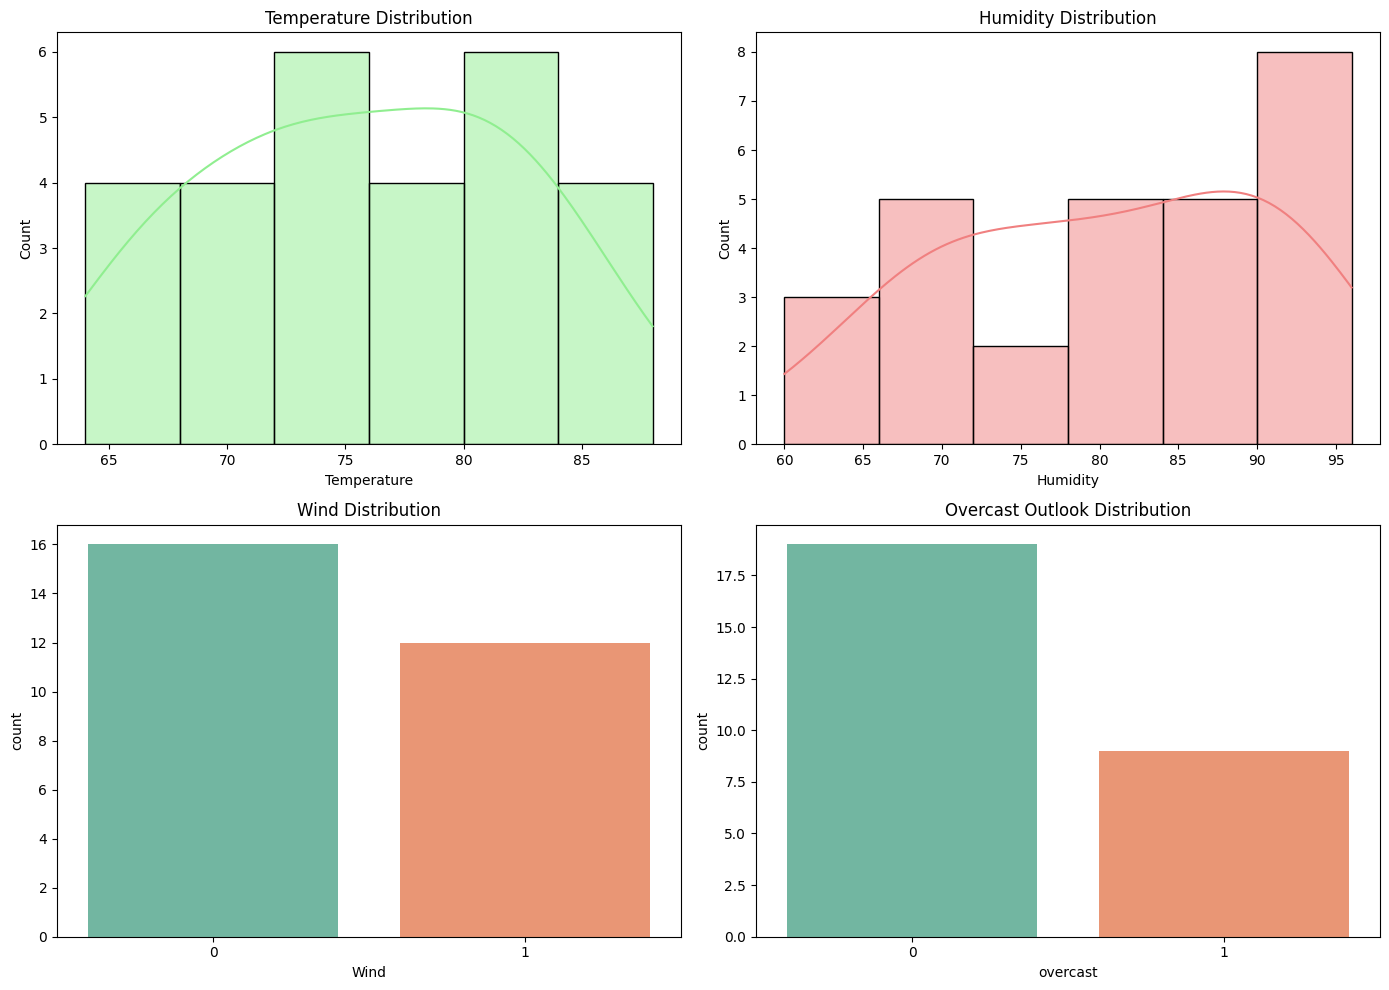

In [3]:
# Plot the distribution of features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['Temperature'], kde=True, color='lightgreen', ax=axes[0, 0])
axes[0, 0].set_title('Temperature Distribution')

sns.histplot(df['Humidity'], kde=True, color='lightcoral', ax=axes[0, 1])
axes[0, 1].set_title('Humidity Distribution')

sns.countplot(x='Wind', data=df, palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Wind Distribution')

sns.countplot(data=df, x='overcast', palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Overcast Outlook Distribution')

plt.tight_layout()
plt.show()

#### Feature Correlations

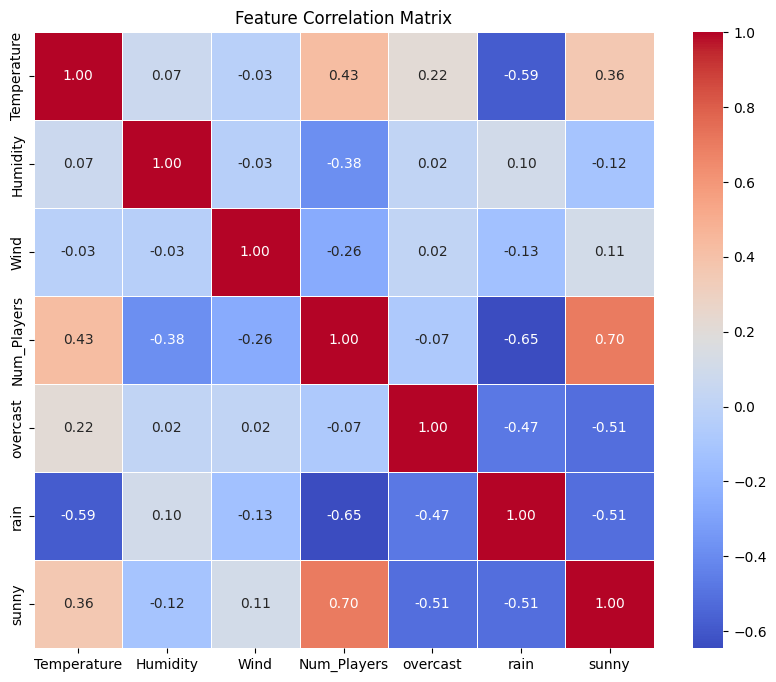

In [4]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

#### Comparison of Actual vs Predicted Values

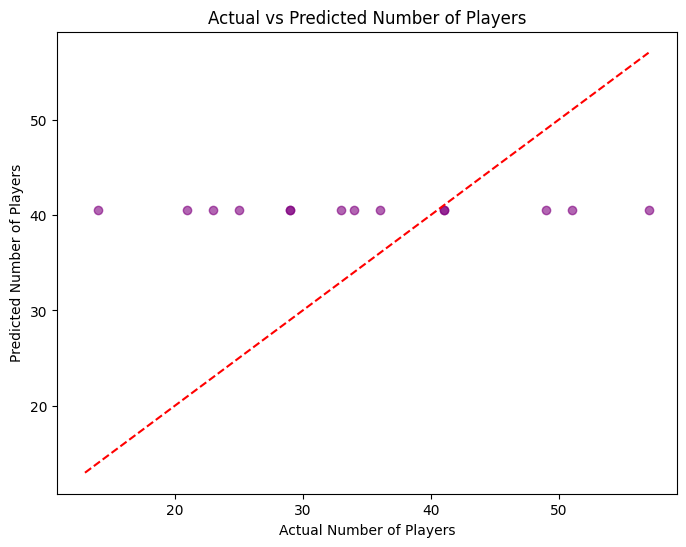

In [5]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # Identity line
plt.title('Actual vs Predicted Number of Players')
plt.xlabel('Actual Number of Players')
plt.ylabel('Predicted Number of Players')
plt.show()

#### Residual Plot

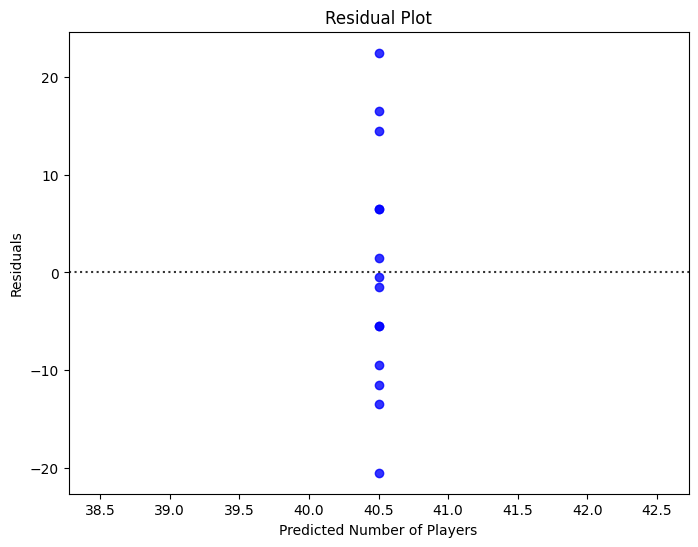

In [6]:
# Calculate residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue', line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Number of Players')
plt.ylabel('Residuals')
plt.show()

#### RMSE Evaluation

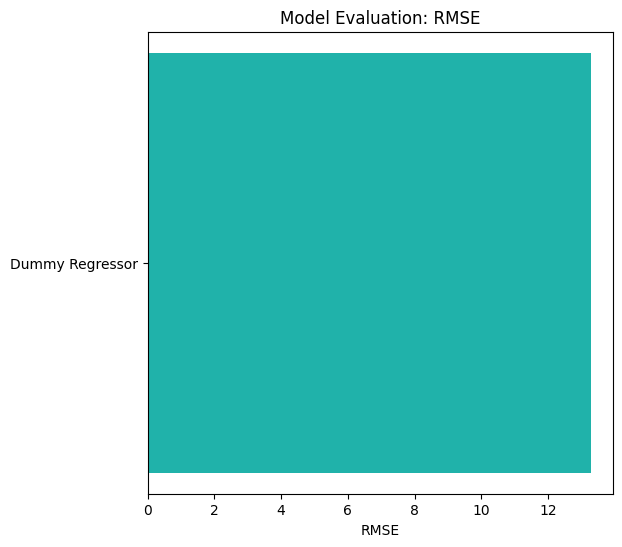

In [7]:
# Plot RMSE
plt.figure(figsize=(6, 6))
plt.barh(['Dummy Regressor'], [rmse], color='lightseagreen')
plt.xlabel('RMSE')
plt.title('Model Evaluation: RMSE')
plt.show()